Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:



In [27]:
import pandas as pd
import numpy as np
import acquire
import prepare

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
titanic = acquire.get_titanic_data()
titanic

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [3]:
train, validate, test = prepare.prep_titanic_data(titanic)
train, validate, test = prepare.impute_age_titanic(train, validate, test)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1
356,1,1,22.000000,0,1,55.0000,0,0,0,1
147,0,3,9.000000,2,2,34.3750,0,0,0,1


In [5]:
train.info(), validate.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 301 to 3
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   age                      498 non-null    float64
 3   sibsp                    498 non-null    int64  
 4   parch                    498 non-null    int64  
 5   fare                     498 non-null    float64
 6   alone                    498 non-null    int64  
 7   sex_male                 498 non-null    uint8  
 8   embark_town_Queenstown   498 non-null    uint8  
 9   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 32.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 91 to 466
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------               

(None, None, None)

In [13]:
train.survived.value_counts(), validate.survived.value_counts(), test.survived.value_counts()

(0    307
 1    191
 Name: survived, dtype: int64,
 0    132
 1     82
 Name: survived, dtype: int64,
 0    110
 1     69
 Name: survived, dtype: int64)

The data was split to the train, validate, test subgroups with the target of survived appropriately divided.

In [14]:
# 1. What is your baseline prediction?
baseline_prediction = 0 
baseline_prediction

# 0 as a boolean in the survived column representing did not survive

0

In [17]:
# What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the 
# most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? 
# This is your baseline accuracy.
train[train.survived == baseline_prediction].shape[0] / train.shape[0]

# Baseline accuracy is roughly 61.6% of passengers in the titanic dataset died.

0.6164658634538153

In [47]:
# 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training 
# sample)

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

clf_3_deep = DecisionTreeClassifier(max_depth=3, random_state=123)
clf_3_deep = clf_3_deep.fit(X_train, y_train)

[Text(392.92499999999995, 332.955, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(241.79999999999998, 237.825, 'pclass <= 2.5\ngini = 0.411\nsamples = 187\nvalue = [54, 133]\nclass = 1'),
 Text(120.89999999999999, 142.695, 'age <= 43.5\ngini = 0.116\nsamples = 97\nvalue = [6, 91]\nclass = 1'),
 Text(60.449999999999996, 47.565, 'gini = 0.072\nsamples = 80\nvalue = [3, 77]\nclass = 1'),
 Text(181.35, 47.565, 'gini = 0.291\nsamples = 17\nvalue = [3, 14]\nclass = 1'),
 Text(362.7, 142.695, 'fare <= 24.808\ngini = 0.498\nsamples = 90\nvalue = [48, 42]\nclass = 0'),
 Text(302.25, 47.565, 'gini = 0.493\nsamples = 75\nvalue = [33, 42]\nclass = 1'),
 Text(423.15, 47.565, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = 0'),
 Text(544.05, 237.825, 'age <= 3.5\ngini = 0.303\nsamples = 311\nvalue = [253, 58]\nclass = 0'),
 Text(483.59999999999997, 142.695, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = 1'),
 Text(604.5, 142.695, 'fare <= 26.144\ngini = 

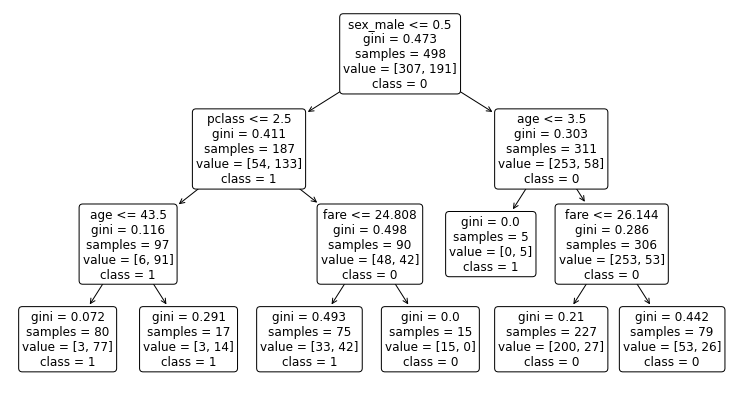

In [48]:
plt.figure(figsize=(13, 7))
plot_tree(clf_3_deep, feature_names=X_train.columns, class_names=clf_3_deep.classes_.astype(str), rounded=True)


In [65]:
y_pred_3 = clf_3_deep.predict(X_train)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

##### #3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [52]:
print(f'Accuracy of Decision Tree classifier on training set: {clf_3_deep.score(X_train, y_train):.2f}')

Accuracy of Decision Tree classifier on training set: 0.82


In [68]:
confusion_matrix(y_train, y_pred_3)

array([[268,  39],
       [ 53, 138]])

In [54]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [69]:
pd.DataFrame(confusion_matrix(y_train, y_pred_3))

,0,1
0,268,39
1,53,138


In [76]:
pd.DataFrame(classification_report(y_train, y_pred_3, output_dict=True)).T

,precision,recall,f1-score,support
0,0.834891,0.872964,0.853503,307.000000
1,0.779661,0.722513,0.750000,191.000000
accuracy,0.815261,0.815261,0.815261,0.815261
macro avg,0.807276,0.797739,0.801752,498.000000
weighted avg,0.813708,0.815261,0.813806,498.000000


##### #4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

When our positive scenario is that someone survived and our negative scenario is that they did not survive, we get the following numbers:
- Accuracy 81.5%
- True Positive rate: 138 /498 = 27.71%
- False Positive rate: 39 / 498 = 7.83%
- True Negative rate: 268 / 498 = 53.81%
- False Negative rate: 53 / 498 = 10.64%
- Precision: 77.97%
- Recall: 72.25%
- F1-score: 75.00%
- Support: 191

##### #5. Run through steps 2-4 using a different max_depth value.

[Text(397.4938953488372, 356.73749999999995, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(248.82906976744184, 309.1725, 'pclass <= 2.5\ngini = 0.411\nsamples = 187\nvalue = [54, 133]\nclass = 1'),
 Text(160.2627906976744, 261.60749999999996, 'age <= 43.5\ngini = 0.116\nsamples = 97\nvalue = [6, 91]\nclass = 1'),
 Text(101.21860465116279, 214.0425, 'age <= 27.5\ngini = 0.072\nsamples = 80\nvalue = [3, 77]\nclass = 1'),
 Text(84.34883720930232, 166.4775, 'age <= 24.5\ngini = 0.161\nsamples = 34\nvalue = [3, 31]\nclass = 1'),
 Text(50.609302325581396, 118.91250000000002, 'fare <= 13.396\ngini = 0.064\nsamples = 30\nvalue = [1, 29]\nclass = 1'),
 Text(33.73953488372093, 71.34749999999997, 'age <= 22.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = 1'),
 Text(16.869767441860464, 23.782500000000027, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 1'),
 Text(50.609302325581396, 23.782500000000027, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass =

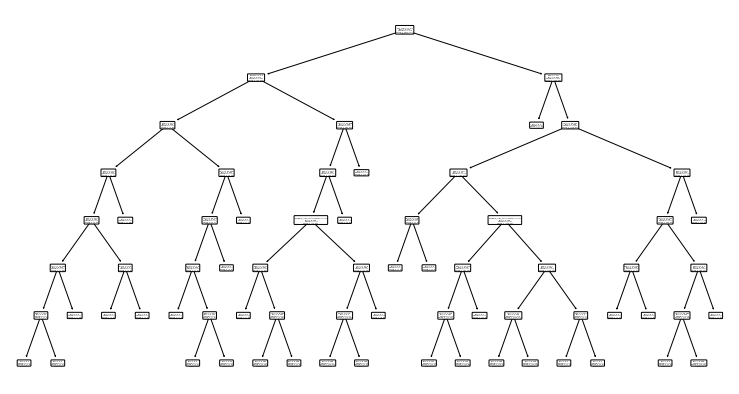

In [57]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

clf_7_deep = DecisionTreeClassifier(max_depth=7, random_state=123)
clf_7_deep = clf_7_deep.fit(X_train, y_train)

plt.figure(figsize=(13, 7))
plot_tree(clf_7_deep, feature_names=X_train.columns, class_names=clf_7_deep.classes_.astype(str), rounded=True)


In [71]:
y_pred_7 = clf_7_deep.predict(X_train)
print(f'Accuracy of Decision Tree classifier on training set: {clf_7_deep.score(X_train, y_train):.2f}')

Accuracy of Decision Tree classifier on training set: 0.87


In [72]:
confusion_matrix(y_train, y_pred_7)

array([[300,   7],
       [ 59, 132]])

In [73]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [74]:
pd.DataFrame(confusion_matrix(y_train, y_pred_7))

,0,1
0,300,7
1,59,132


In [75]:
pd.DataFrame(classification_report(y_train, y_pred_7, output_dict=True)).T

,precision,recall,f1-score,support
0,0.835655,0.977199,0.900901,307.00000
1,0.949640,0.691099,0.800000,191.00000
accuracy,0.867470,0.867470,0.867470,0.86747
macro avg,0.892647,0.834149,0.850450,498.00000
weighted avg,0.879372,0.867470,0.862202,498.00000


### Under the new model with depth set to 7 instead of 3, when our positive scenario is that someone survived and our negative scenario is that they did not survive, we get the following numbers:
- Accuracy 86.7%
- True Positive rate: 132 /498 = 26.5%
- False Positive rate: 7 / 498 = 1.4% 
- True Negative rate: 300 / 498 = 60.24%
- False Negative rate: 59 / 498 = 5.82%
- Precision: 94.96%
- Recall: 69.1%
- F1-score: 80.0%
- Support: 191

##### #6. Which model performs better on your in-sample data?

The second model which has a max_depth of 7 performs better on the train data than the first sample which has a max_depth of only 3.

##### #7. Which model performs best on your out-of-sample data, the validate set?



In [77]:
print(f'Accuracy of 3 Deep Decision Tree classifier on training set: {clf_3_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 7 Deep Decision Tree classifier on training set: {clf_7_deep.score(X_validate, y_validate):.2f}')

Accuracy of 3 Deep Decision Tree classifier on training set: 0.83
Accuracy of 7 Deep Decision Tree classifier on training set: 0.81


The accuracy of the less deep decision tree model with only 3 questions is more accurate on the validate set.